In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')

# Check if there any missing values

## Method 1

In [3]:
train.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

## Method 2

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [8]:
train["Age"].describe()

count    12079.000000
mean        42.234539
std         97.492565
min      -6099.000000
25%         35.000000
50%         41.000000
75%         50.000000
max        320.000000
Name: Age, dtype: float64

# Representation of Missing Values

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df = train.copy()

## Method 1 - Plot

In [32]:
table = pd.DataFrame(train.isna().sum().sort_values())[pd.DataFrame(train.isna().sum()).iloc[:,0] != 0]
table = table.rename(columns = {0 : 'Missing Values'})
table

,Missing Values
Gender,359
Subject_Car_Make,2476
Car_Category,3738
LGA_Name,6476
State,6488
Subject_Car_Colour,6962


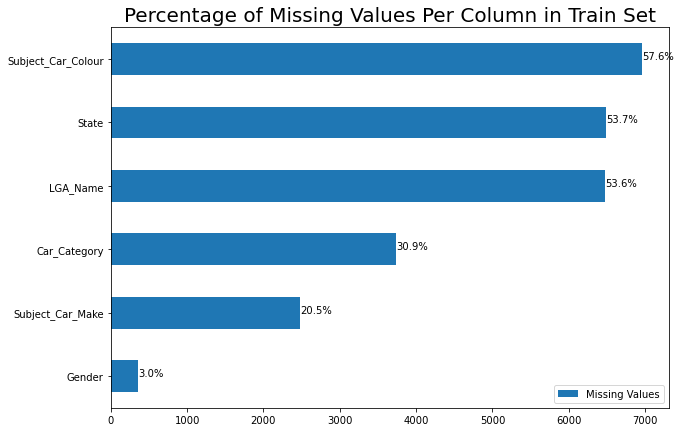

In [71]:
# Check if there any missing values in train set
table = pd.DataFrame(train.isna().sum().sort_values())[pd.DataFrame(train.isna().sum()).iloc[:,0] != 0]
table = table.rename(columns = {0 : 'Missing Values'})
ax = table.plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':20})
for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.04
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

## Method 2 - Table

In [72]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(train)

Your selected dataframe has 14 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Subject_Car_Colour,6962,57.6
State,6488,53.7
LGA_Name,6476,53.6
Car_Category,3738,30.9
Subject_Car_Make,2476,20.5
Gender,359,3.0


## Method 3 - msno

### Matrix

<AxesSubplot:>

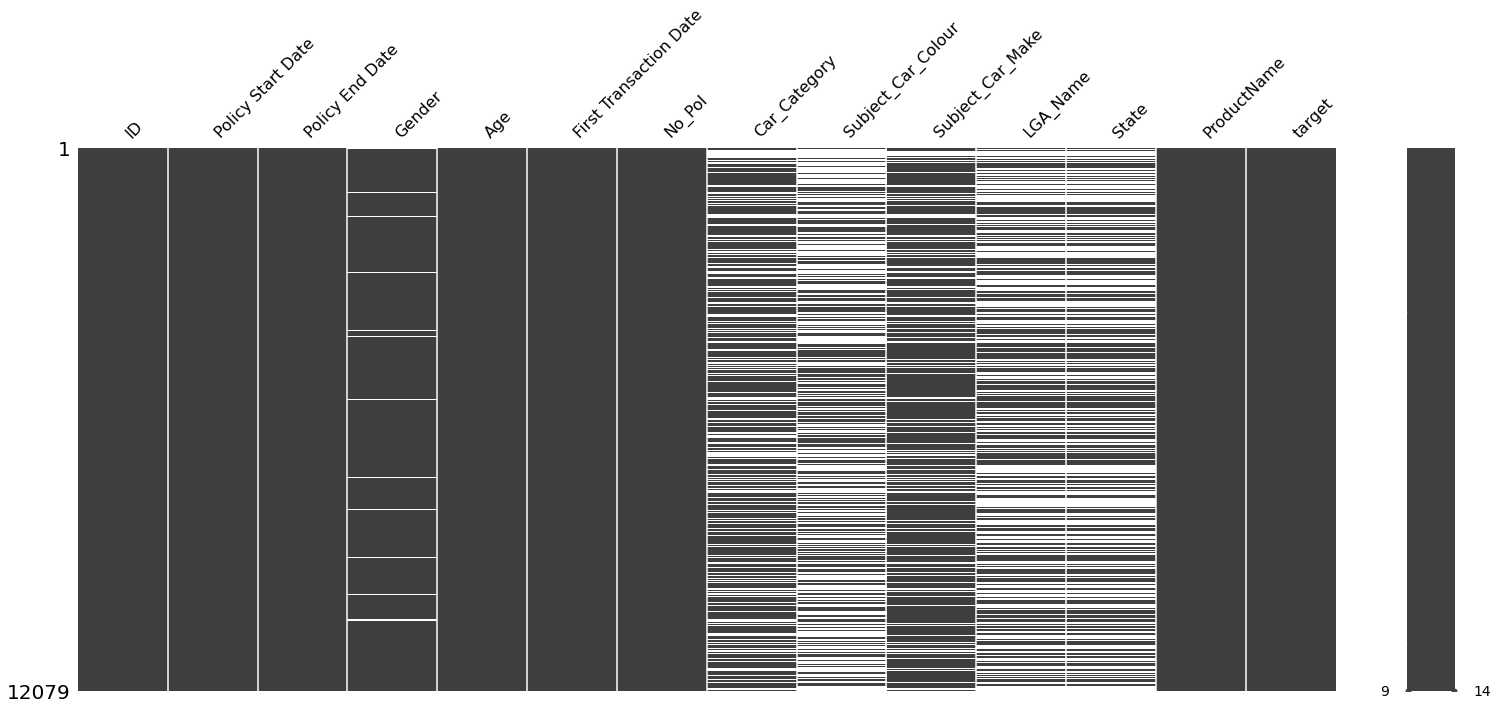

In [34]:
import missingno as msno
msno.matrix(train)

### bar

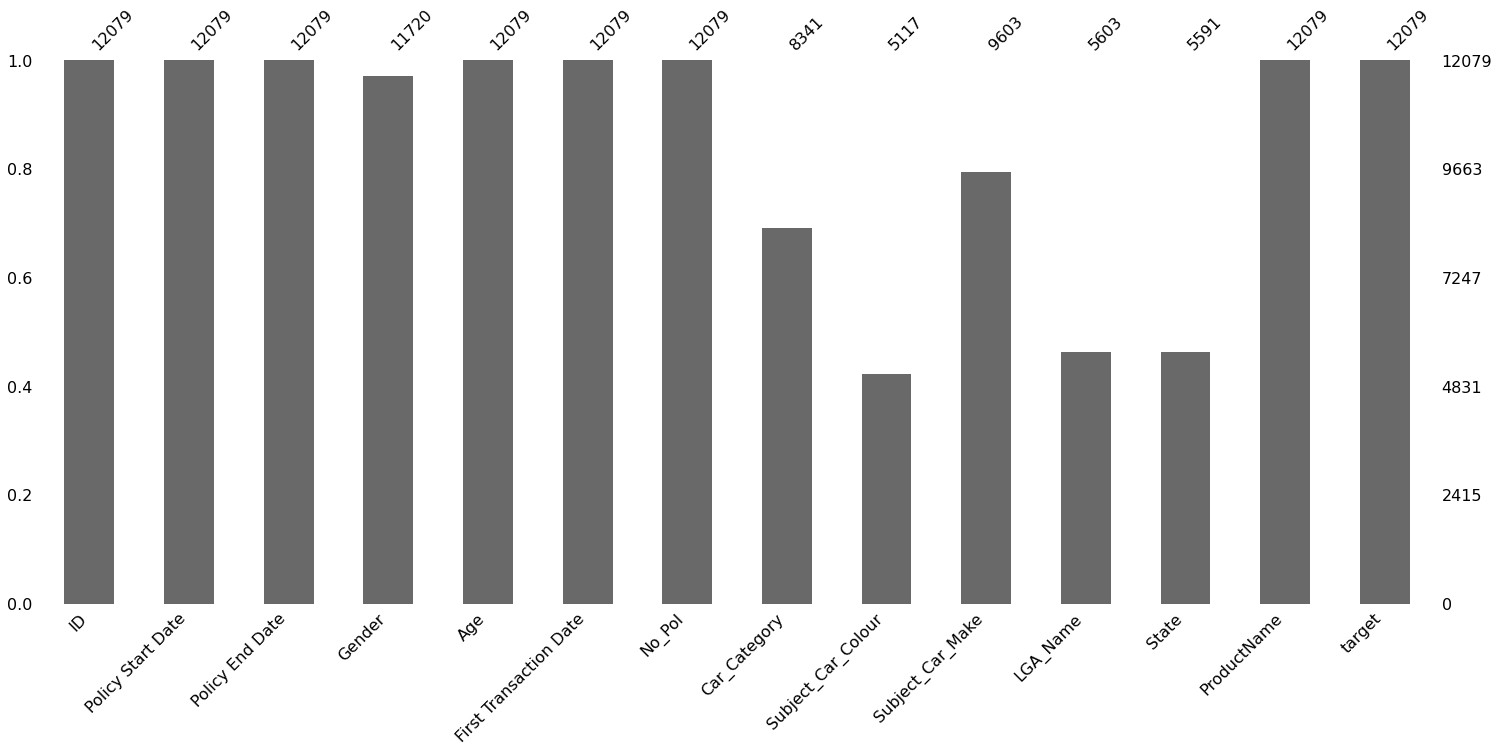

In [75]:
try:
    import missingno as msno
    msno.bar(train)
except:
    !pip install missingno
    import missingno as msno
    msno.bar(train)

### Heatmap

<AxesSubplot:>

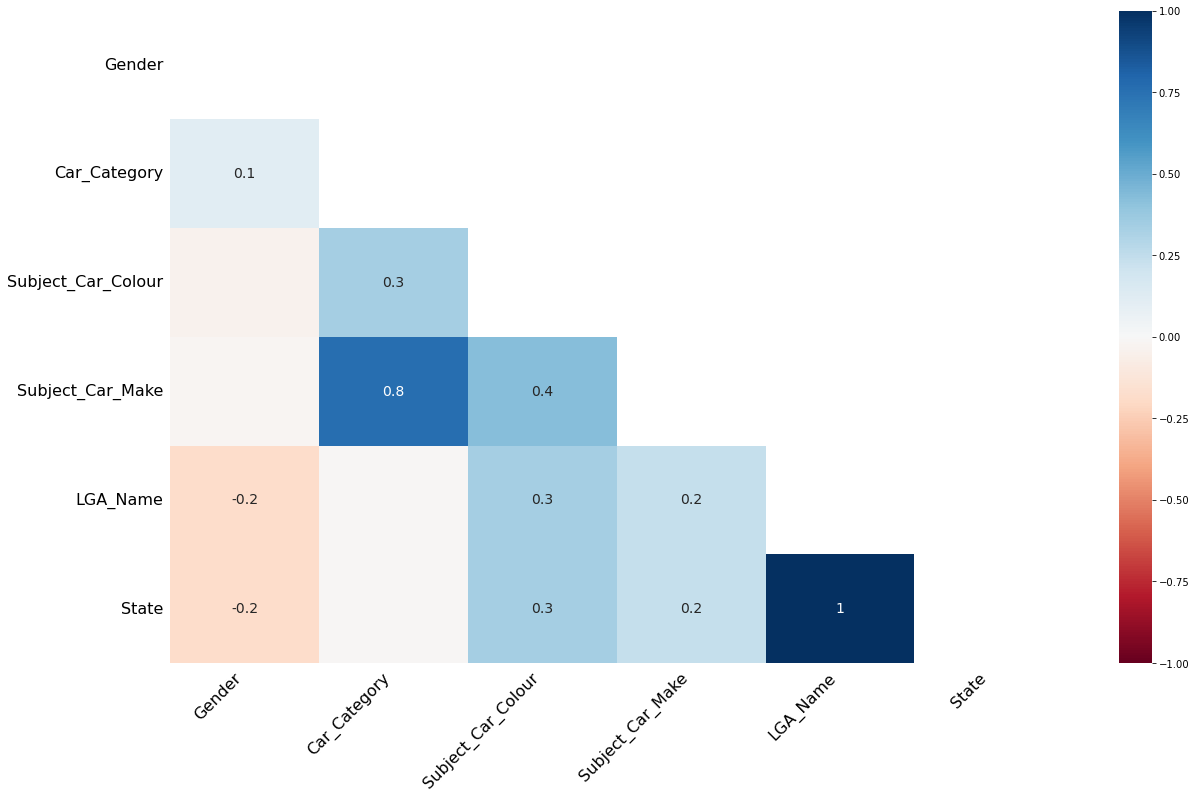

In [80]:
msno.heatmap(train)

### Matrix

<AxesSubplot:>

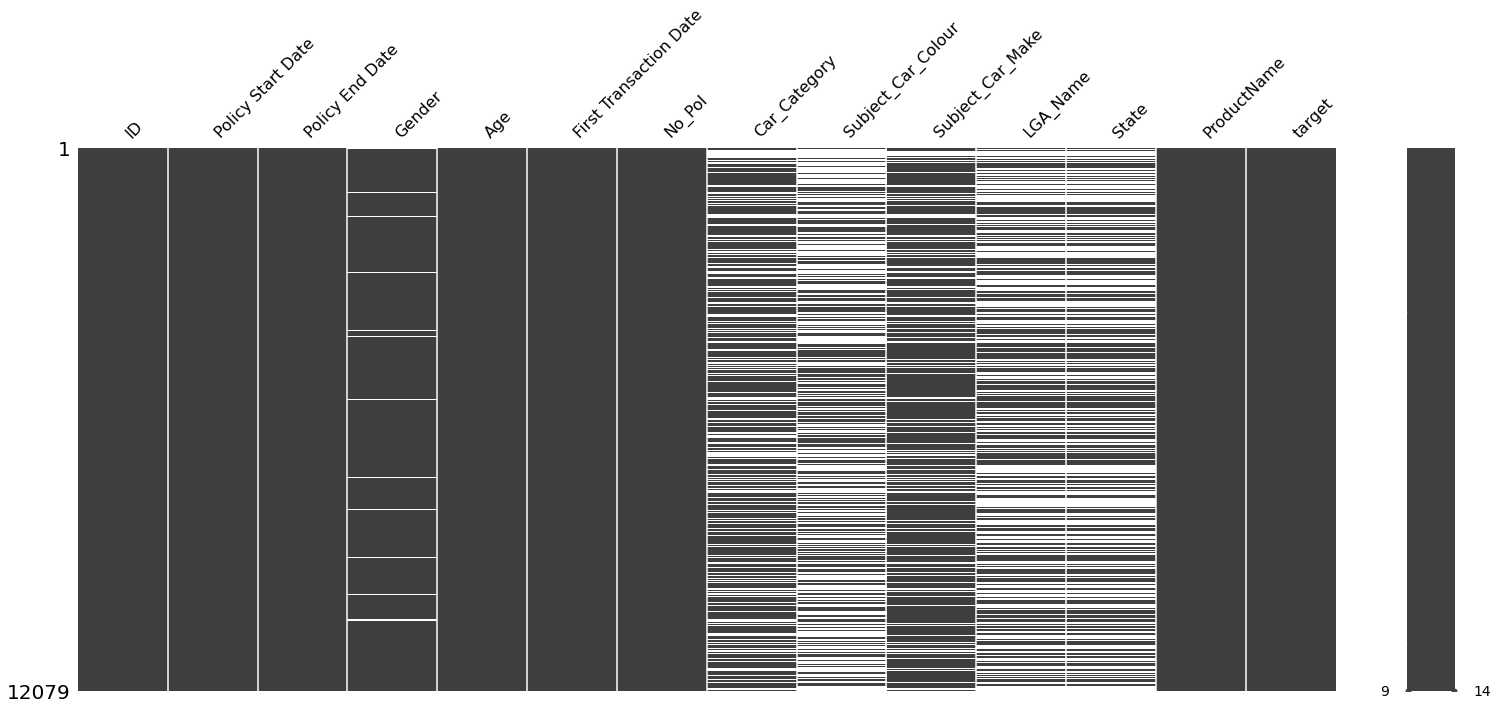

In [28]:
import missingno as msno
msno.matrix(train)

In [ ]:
msno.matrix(train.head(20))

# Dropping rows/column

   - **This is however not recommended as it might result in loss of information from the dataset.**

## Rows

In [83]:
# Make a copy of train DataFrame
df = train.copy()

In [84]:
#Drop rows which contains any NaN or missing value for Age column
print(df['Gender'].isnull().sum(), df.shape)
df.dropna(subset=['Gender'],how='any',inplace=True)
print(df['Gender'].isnull().sum(), df.shape)

359 (12079, 14)
0 (11720, 14)


## Column

* If a column contains a lot of missing values, say more than 80%:
        - The feature is not significant, you might want to delete that feature. 
        - However, again, it is not a good methodology to delete data.

In [86]:
# Make a copy of train DataFrame
df = train.copy()
#Drop rows which contains any NaN or missing value for Age column
print(df.shape)
del df['Gender']
print(df.shape)

(12079, 14)
(12079, 13)


# Imputations Techniques

In [95]:
# Make a copy of train DataFrame
df = train.copy()
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


## Imputating with a constant value

   - **Replacing Missing values with a constant value.**

In [96]:
d = df.apply(lambda x: x.fillna(-99),axis=0)
d.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,-99,-99,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,-99,-99,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,-99,-99,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,-99,-99,-99,-99,-99,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,-99,-99,-99,Lagos,Lagos,Muuve,1


## Imputation using the statistics (mean, median or most frequent) of each column in which the missing values are located

### Mean

* Can only work with Numerical columns

#### One Column

In [ ]:
#df['name_column'] = df['name_column'].fillna(df['name_column'].mean())
#d.head()

#### Entire Dataset

In [ ]:
#d = df.apply(lambda x: x.fillna(x.mean()),axis=0)
#d.head()

### Median

* Can only work with Numerical columns

#### One Column

In [ ]:
#df['name_column'] = df['name_column'].fillna(df['name_column'].median())
#d.head()

#### Entire Dataset

In [ ]:
#d = df.apply(lambda x: x.fillna(x.median()),axis=0)
#d.head()

### Mode

#### One Column

In [37]:
d = train.copy()
d['LGA_Name'].value_counts().index[0]

'Victoria Island'

In [12]:
d = train.copy()
d['LGA_Name'] = d['LGA_Name'].fillna(d['LGA_Name'].value_counts().index[0])
d.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,Victoria Island,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


#### Entire Dataset

In [38]:
df = train.copy()

In [39]:
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [16]:
df = train.copy()
d = df.apply(lambda x: x.fillna(x.value_counts().index[0]) ,axis=0)
d.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1


In [13]:
from sklearn.impute import SimpleImputer
df = train.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = mean_imputer.fit_transform(df)
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1


# Advanced Imputation Techniques

## K-Nearest Neighbor Imputation

In [31]:
from sklearn.impute import KNNImputer
train_knn = train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Car_Category'] = knn_imputer.fit_transform(train_knn[['Car_Category']])
train_knn['State'] = knn_imputer.fit_transform(train_knn[['State']])
train_knn.head()

ValueError: could not convert string to float: 'Saloon'